<img src="https://c8.alamy.com/comp/WWB4A5/mobile-vector-icon-smart-phone-tablet-mobile-version-WWB4A5.jpg" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Mobile tablet price - Predict "price" of used mobile/tablet</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-04-16 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: MDS5_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname: Nguyễn Lương Minh
- Date of birth: 11/11/1991
- Place of birth: Bến Tre
- Email: lminhtm@gmail.com
- Mobile phone: 0395666208

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of used mobile/tablet"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: used_device_data.csv

#### Data dictionary:
1. device_brand: Name of manufacturing brand
2. os: OS on which the device runs
3. screen_size: Size of the screen in cm
4. internet: Whether 4G is available or 5G or Both
5. front_camera_mp: Resolution of the rear camera in megapixels
6. back_camera_mp: Resolution of the front camera in megapixels
7. internal_memory: Amount of internal memory (ROM) in GB
8. ram: Amount of RAM in GB
9. battery: Energy capacity of the device battery in mAh
10. weight: Weight of the device in grams
11. release_year: Year when the device model was released
12. days_used: Number of days the used/refurbished device has been used
13. normalized_new_price: Normalized price of a new device of the same model
14. normalized_used_price (TARGET): Normalized price of the used/refurbished device

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

## Import library package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.analyzer import TTTH_Analyzer
from processor.feature import FeatureProcessor

In [2]:
_analyzer = TTTH_Analyzer()
_processor = FeatureProcessor()

## Read dataset, clean headers and check overview

In [3]:
df = pd.read_csv('input_data/used_device_data.csv')

In [4]:
df.head()

,device_brand,os,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,internet
0,Honor,Android,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4g
1,Honor,Android,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,both
2,Honor,Android,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,both
3,Honor,Android,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,both
4,Honor,Android,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,4g


In [5]:
df.tail()

,device_brand,os,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,internet
3449,Asus,Android,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872,4g
3450,Asus,Android,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538,4g
3451,Alcatel,Android,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,4g
3452,Alcatel,Android,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,4g
3453,Alcatel,Android,12.83,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994,4g


In [6]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   rear_camera_mp         3275 non-null   float64
 4   front_camera_mp        3452 non-null   float64
 5   internal_memory        3450 non-null   float64
 6   ram                    3450 non-null   float64
 7   battery                3448 non-null   float64
 8   weight                 3447 non-null   float64
 9   release_year           3454 non-null   int64  
 10  days_used              3454 non-null   int64  
 11  normalized_used_price  3454 non-null   float64
 12  normalized_new_price   3454 non-null   float64
 13  internet               3454 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 377.9+ 

* Seem some variable got missing values, need to handle in next step
* `release_year` must be category

## Identify variable

As requirement, predict `normalized_used_price` of devices so
* Output variable: normalized_used_price
* Input variable: 
    * device_brand
    * os
    * screen_size
    * internet
    * front_camera_mp
    * back_camera_mp
    * internal_memory
    * ram
    * battery
    * weight
    * release_year
    * days_used
    * normalized_new_price

### Check de-duplicates

In [8]:
df.duplicated().sum()

0

No duplicated data

### Handle missing values

In [9]:
_processor.handle_missing_values_by_median('rear_camera_mp', df)

rear_camera_mp before fill missing values: 179
rear_camera_mp after fill missing values: 0


In [10]:
_processor.handle_missing_values_by_median('front_camera_mp', df)

front_camera_mp before fill missing values: 2
front_camera_mp after fill missing values: 0


In [11]:
_processor.handle_missing_values_by_median('internal_memory', df)

internal_memory before fill missing values: 4
internal_memory after fill missing values: 0


In [12]:
_processor.handle_missing_values_by_median('ram', df)

ram before fill missing values: 4
ram after fill missing values: 0


In [13]:
_processor.handle_missing_values_by_median('battery', df)

battery before fill missing values: 6
battery after fill missing values: 0


In [14]:
_processor.handle_missing_values_by_median('weight', df)

weight before fill missing values: 7
weight after fill missing values: 0


In [15]:
df.isnull().values.any()

False

### Split into numeric and category dataframe to analyze

In [16]:
df['release_year'] = df['release_year'].astype('O')

* We need to convert `release_year` into category dtypes

In [17]:
df_output = df[['normalized_used_price']]
df_output.head()

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [18]:
df_input = df.drop('normalized_used_price', axis=1)
df_input.head()

,device_brand,os,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,internet
0,Honor,Android,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,4g
1,Honor,Android,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,both
2,Honor,Android,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,both
3,Honor,Android,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,both
4,Honor,Android,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,4g


In [19]:
df_input_category = df_input.select_dtypes(include='O')
df_input_category.head()

,device_brand,os,release_year,internet
0,Honor,Android,2020,4g
1,Honor,Android,2020,both
2,Honor,Android,2020,both
3,Honor,Android,2020,both
4,Honor,Android,2020,4g


In [20]:
df_input_numberic = df_input.select_dtypes(include='number')
df_input_numberic.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837


## Univariate analysis

### Input Category analysis

In [21]:
df_input_category.columns

Index(['device_brand', 'os', 'release_year', 'internet'], dtype='object')

Class count of device_brand:

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: device_brand, dtype: int64


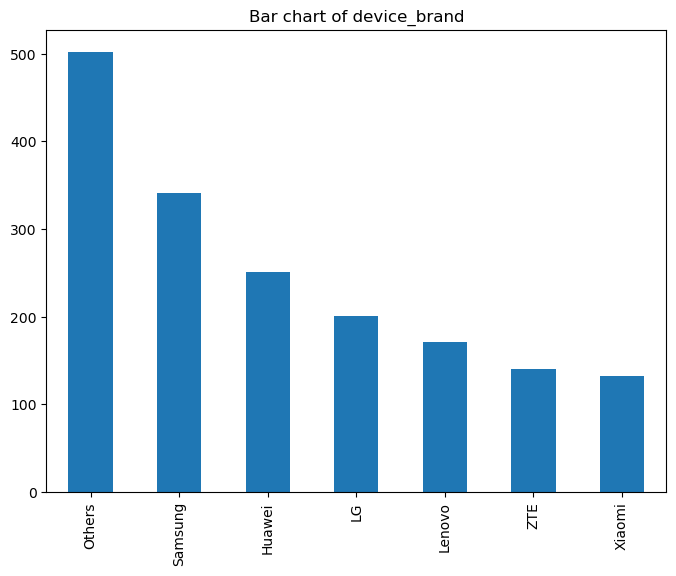

In [22]:
_analyzer.analyze_category_variable('device_brand', df)

* Seem there are some uncommon category, should be handle

Class count of os:

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64


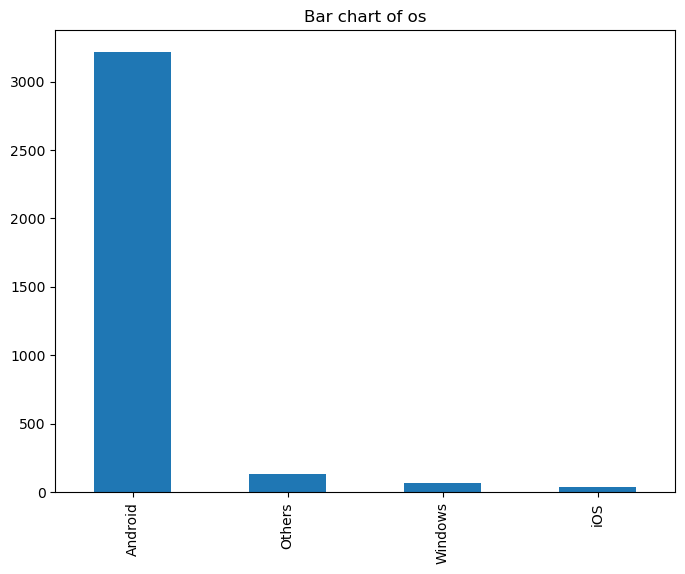

In [23]:
_analyzer.analyze_category_variable('os', df)

Class count of internet:

4g      2183
no      1119
both     152
Name: internet, dtype: int64


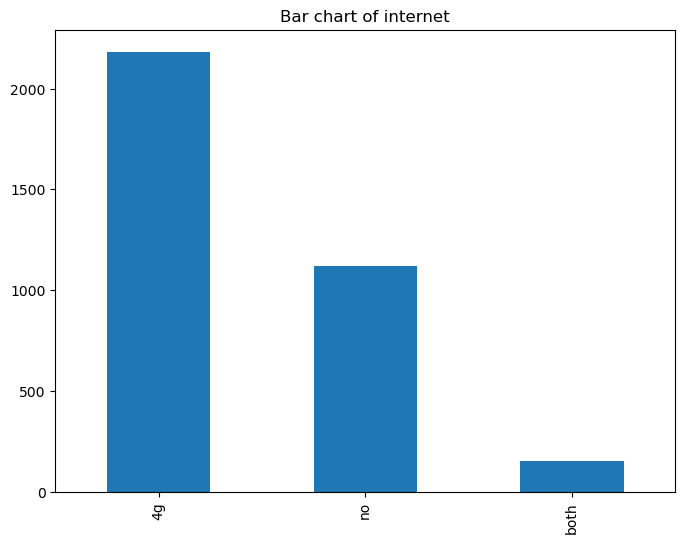

In [24]:
_analyzer.analyze_category_variable('internet', df)

Class count of release_year:

2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: release_year, dtype: int64


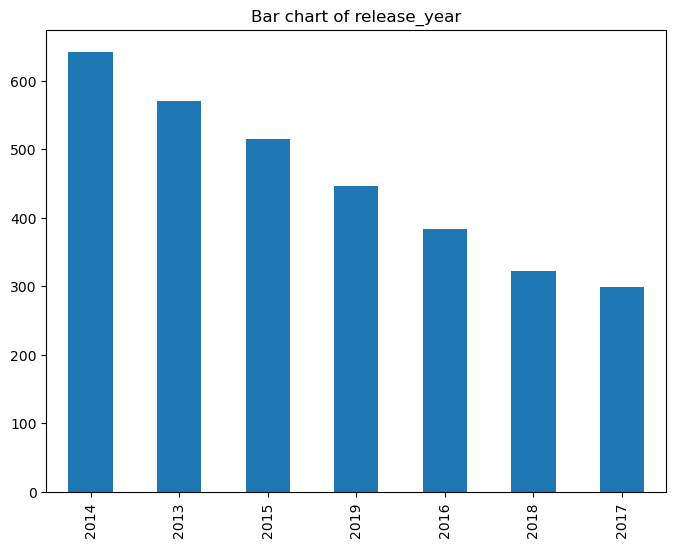

In [25]:
_analyzer.analyze_category_variable('release_year', df)

### Input Numerical analysis

In [26]:
df_input_numberic.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'days_used', 'normalized_new_price'],
      dtype='object')

=====
central tendency of screen_size: {'mean': 13.713115228720477, 'median': 12.83, 'mode': 12.7, 'min': 5.08, 'max': 30.71, 'range': 25.630000000000003}
=====
Dispersion of screen_size: 
 {'range': 25.630000000000003, 'q1': 12.7, 'q3': 15.34, 'iqr': 2.6400000000000006, 'var': 14.480152817880198, 'skew': 1.023931801055376, 'kurtosis': 2.7622696821314072}
=====


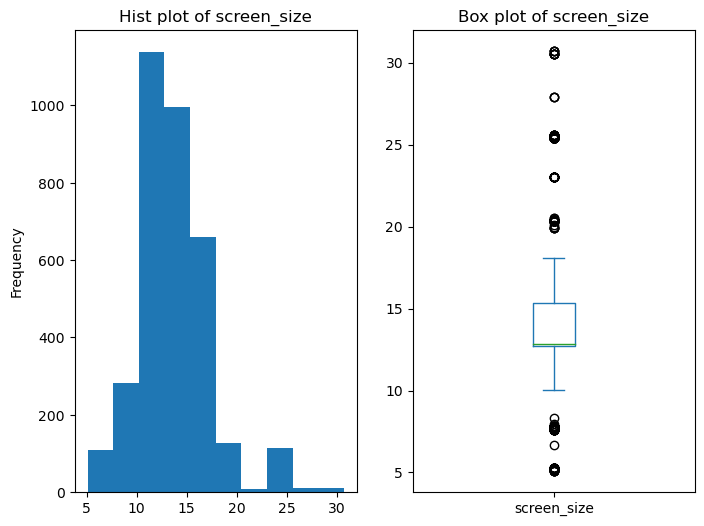

In [27]:
_analyzer.analyze_numeric_variable('screen_size', df)

`screen_size` skew right, have outlier

=====
central tendency of rear_camera_mp: {'mean': 9.384533873769556, 'median': 8.0, 'mode': 13.0, 'min': 0.08, 'max': 48.0, 'range': 47.92}
=====
Dispersion of rear_camera_mp: 
 {'range': 47.92, 'q1': 5.0, 'q3': 13.0, 'iqr': 8.0, 'var': 22.09139333899134, 'skew': 0.8273189423194105, 'kurtosis': 5.187120762183382}
=====


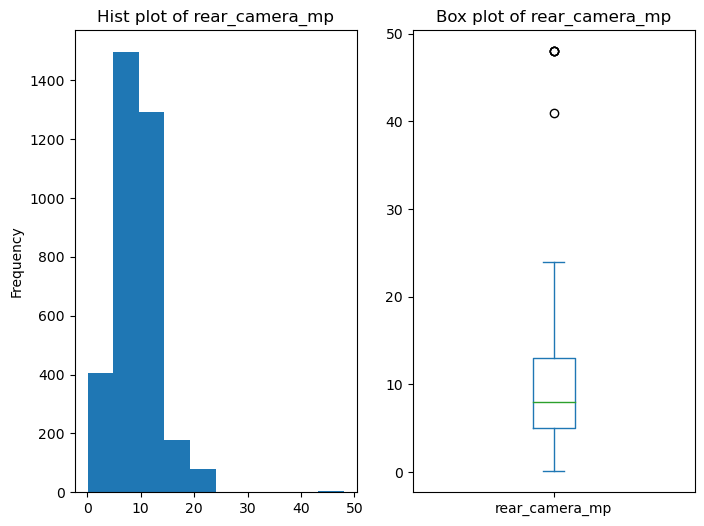

In [28]:
_analyzer.analyze_numeric_variable('rear_camera_mp', df)

`rear_camera_mp` skew right, have outlier

=====
central tendency of front_camera_mp: {'mean': 6.55332947307463, 'median': 5.0, 'mode': 5.0, 'min': 0.0, 'max': 32.0, 'range': 32.0}
=====
Dispersion of front_camera_mp: 
 {'range': 32.0, 'q1': 2.0, 'q3': 8.0, 'iqr': 6.0, 'var': 48.559341648150706, 'skew': 1.8024735831495162, 'kurtosis': 3.339100539259933}
=====


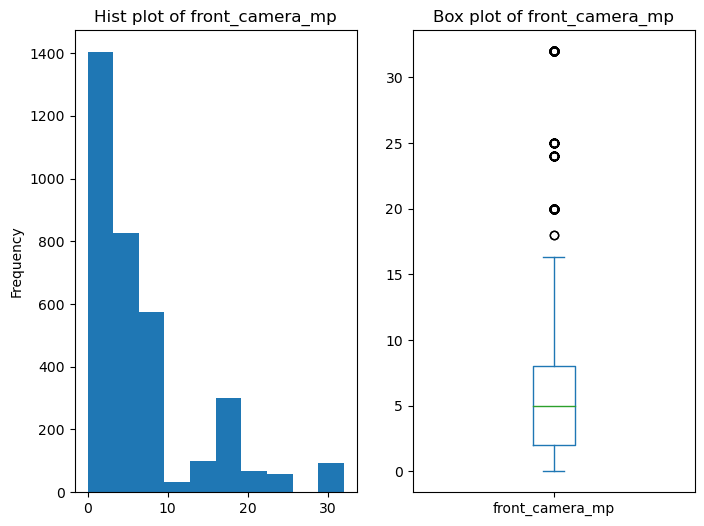

In [29]:
_analyzer.analyze_numeric_variable('front_camera_mp', df)

`front_camera_mp` shape is not good, have outlier

=====
central tendency of internal_memory: {'mean': 54.546957151129135, 'median': 32.0, 'mode': 16.0, 'min': 0.01, 'max': 1024.0, 'range': 1023.99}
=====
Dispersion of internal_memory: 
 {'range': 1023.99, 'q1': 16.0, 'q3': 64.0, 'iqr': 48.0, 'var': 7212.52924671869, 'skew': 5.798296666968713, 'kurtosis': 48.02079074689685}
=====


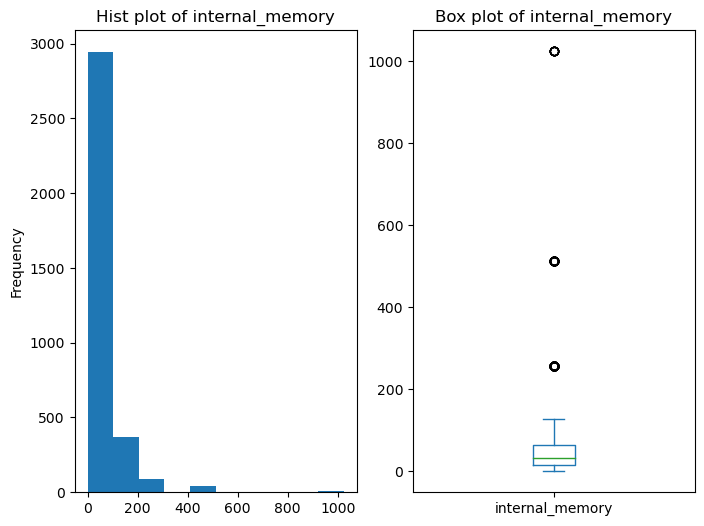

In [30]:
_analyzer.analyze_numeric_variable('internal_memory', df)

`internal_memory` skew right, have outlier

=====
central tendency of ram: {'mean': 4.036079907353796, 'median': 4.0, 'mode': 4.0, 'min': 0.02, 'max': 12.0, 'range': 11.98}
=====
Dispersion of ram: 
 {'range': 11.98, 'q1': 4.0, 'q3': 4.0, 'iqr': 0.0, 'var': 1.861353525035037, 'skew': 1.069887513181793, 'kurtosis': 8.626853039000398}
=====


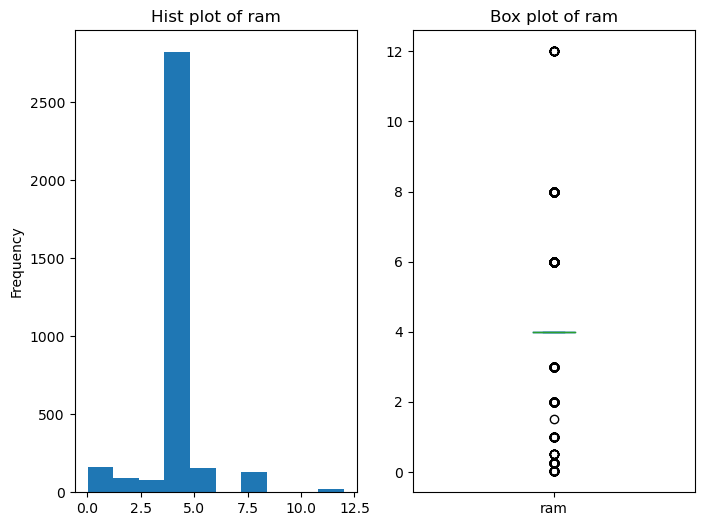

In [31]:
_analyzer.analyze_numeric_variable('ram', df)

`ram` shape is not good, have many outlier

=====
central tendency of battery: {'mean': 3133.1709612044006, 'median': 3000.0, 'mode': 4000.0, 'min': 500.0, 'max': 9720.0, 'range': 9220.0}
=====
Dispersion of battery: 
 {'range': 9220.0, 'q1': 2100.0, 'q3': 4000.0, 'iqr': 1900.0, 'var': 1686271.2198950073, 'skew': 1.3339248260239134, 'kurtosis': 3.324206548371876}
=====


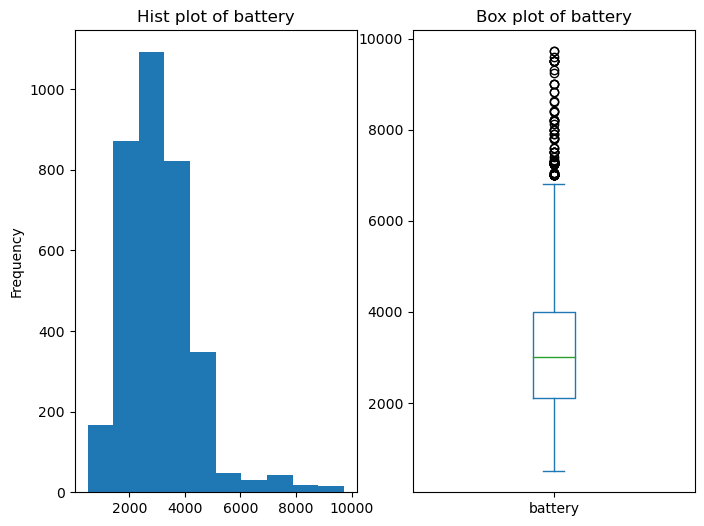

In [32]:
_analyzer.analyze_numeric_variable('battery', df)

`battery` shape is not good and have many outlier

=====
central tendency of weight: {'mean': 182.70576143601633, 'median': 160.0, 'mode': 150.0, 'min': 69.0, 'max': 855.0, 'range': 786.0}
=====
Dispersion of weight: 
 {'range': 786.0, 'q1': 142.0, 'q3': 185.0, 'iqr': 43.0, 'var': 7802.09951791124, 'skew': 3.2366565276111565, 'kurtosis': 12.549979127567994}
=====


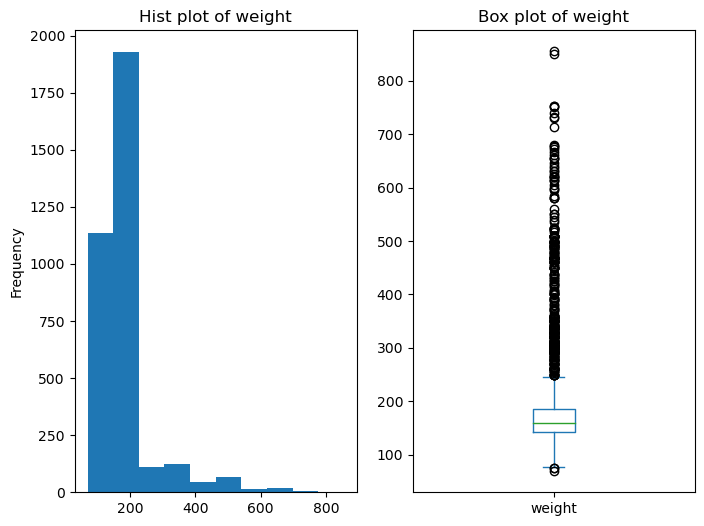

In [33]:
_analyzer.analyze_numeric_variable('weight', df)

`weight` shape is not good and have many outlier

=====
central tendency of days_used: {'mean': 674.8697162709901, 'median': 690.5, 'mode': 564, 'min': 91, 'max': 1094, 'range': 1003}
=====
Dispersion of days_used: 
 {'range': 1003, 'q1': 533.5, 'q3': 868.75, 'iqr': 335.25, 'var': 61792.098862531486, 'skew': -0.34397722518149887, 'kurtosis': -0.683586444129737}
=====


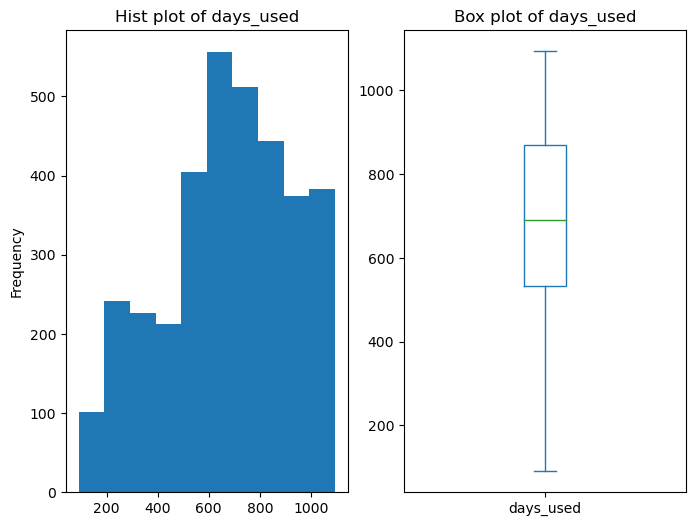

In [34]:
_analyzer.analyze_numeric_variable('days_used', df)

`days_used` shape is not good and have no outlier

=====
central tendency of normalized_new_price: {'mean': 5.233107171903012, 'median': 5.2458918494999995, 'mode': 5.135739612, 'min': 2.901421594, 'max': 7.847840659, 'range': 4.946419065000001}
=====
Dispersion of normalized_new_price: 
 {'range': 4.946419065000001, 'q1': 4.7903418435, 'q3': 5.67371825, 'iqr': 0.8833764065, 'var': 0.46735933292533, 'skew': -0.07702603975602992, 'kurtosis': 0.6526560701710067}
=====


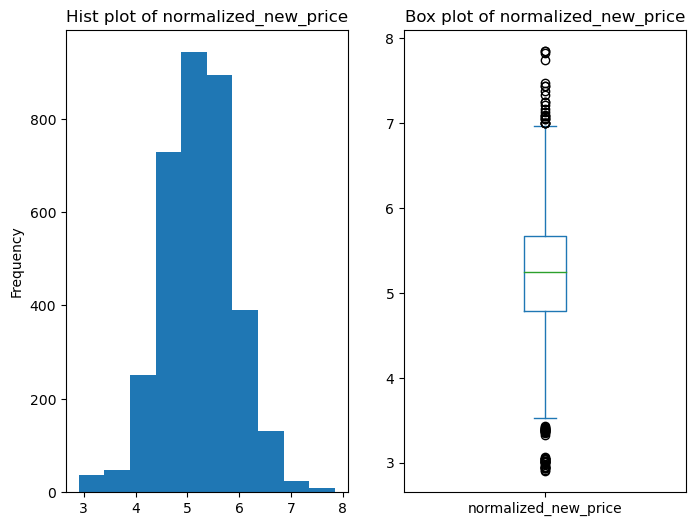

In [35]:
_analyzer.analyze_numeric_variable('normalized_new_price', df)

`normalized_new_price` shape is good and have many outlier

### Output Numerical analysis

=====
central tendency of normalized_used_price: {'mean': 4.364712079133168, 'median': 4.405132623, 'mode': 3.535145354, 'min': 1.53686722, 'max': 6.619433002, 'range': 5.082565782}
=====
Dispersion of normalized_used_price: 
 {'range': 5.082565782, 'q1': 4.0339308525, 'q3': 4.7557000075, 'iqr': 0.7217691549999996, 'var': 0.3468192492891806, 'skew': -0.5323378175277198, 'kurtosis': 1.1788274061623172}
=====


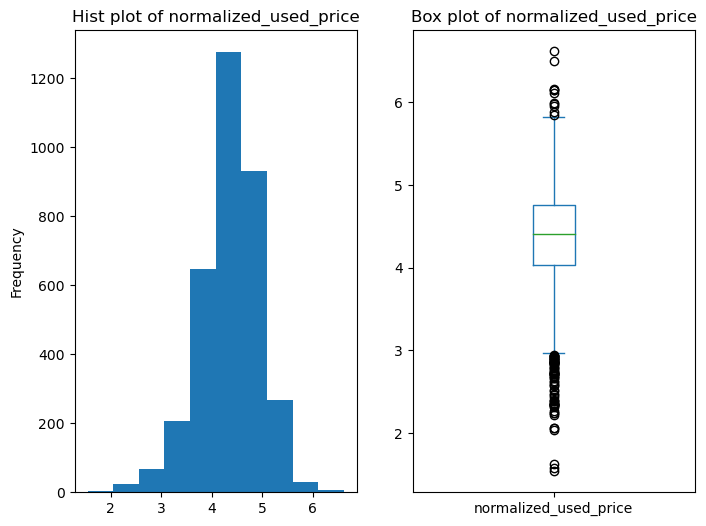

In [36]:
_analyzer.analyze_numeric_variable('normalized_used_price', df)

`normalized_used_price` have many outlier

## Handle uncommon catgory

In [37]:
_processor.handle_uncommon_category('device_brand', df, threshold=25)

Before group uncommon category to Rare 
: Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: device_brand, dtype: int64
After group uncommon category to Rare 
: Others       502
Samsung      341
Huawei       251
LG           201
Lenovo       171
ZTE          140
Xiaomi       132
Oppo         129
Asus         122
Alcatel      121
Micromax     117
Vivo         117
Honor        116
Rare         113
HTC          110
Nokia        106


## Bi-variate analysis

### Continuous vs Continuous (Input and Output)

In [38]:
df_numberic = df.select_dtypes(include='number')

In [39]:
df_numberic.corr()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.139385,0.271615,0.071746,0.273810,0.811240,0.828872,-0.291723,0.614785,0.460889
rear_camera_mp,0.139385,1.000000,0.373565,0.009507,0.211150,0.225791,-0.088483,-0.108173,0.552477,0.512655
front_camera_mp,0.271615,0.373565,1.000000,0.296531,0.477191,0.369661,-0.004688,-0.552377,0.607548,0.474444
internal_memory,0.071746,0.009507,0.296531,1.000000,0.122774,0.118108,0.015374,-0.242377,0.190954,0.196067
ram,0.273810,0.211150,0.477191,0.122774,1.000000,0.280224,0.089901,-0.279737,0.518783,0.530363
battery,0.811240,0.225791,0.369661,0.118108,0.280224,1.000000,0.699772,-0.370623,0.612041,0.469762
weight,0.828872,-0.088483,-0.004688,0.015374,0.089901,0.699772,1.000000,-0.067747,0.382456,0.269694
days_used,-0.291723,-0.108173,-0.552377,-0.242377,-0.279737,-0.370623,-0.067747,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.552477,0.607548,0.190954,0.518783,0.612041,0.382456,-0.358264,1.000000,0.834496
normalized_new_price,0.460889,0.512655,0.474444,0.196067,0.530363,0.469762,0.269694,-0.216625,0.834496,1.000000


Seem `internal_memory`, `weight` and `days_used` not have strong relation with `normalized_used_price`. Consider to drop

### Input Category vs Input Category 

In [40]:
pairs = _analyzer.create_unique_pair_variable(df_input_category.columns)
pairs

[{'device_brand', 'os'},
 {'device_brand', 'release_year'},
 {'device_brand', 'internet'},
 {'os', 'release_year'},
 {'internet', 'os'},
 {'internet', 'release_year'}]

=====Analyze of os and device_brand=====


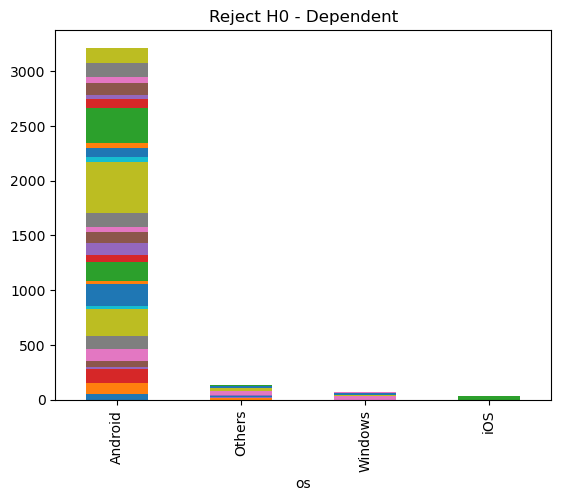

=====Analyze of device_brand and release_year=====


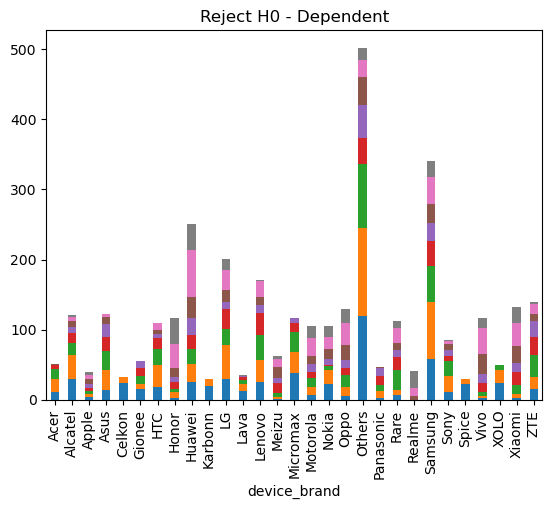

=====Analyze of internet and device_brand=====


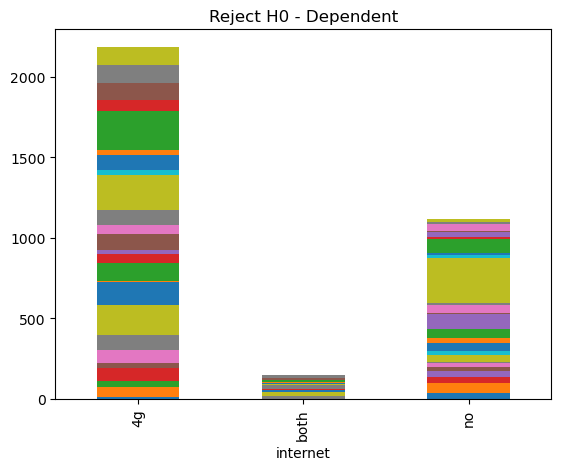

=====Analyze of os and release_year=====


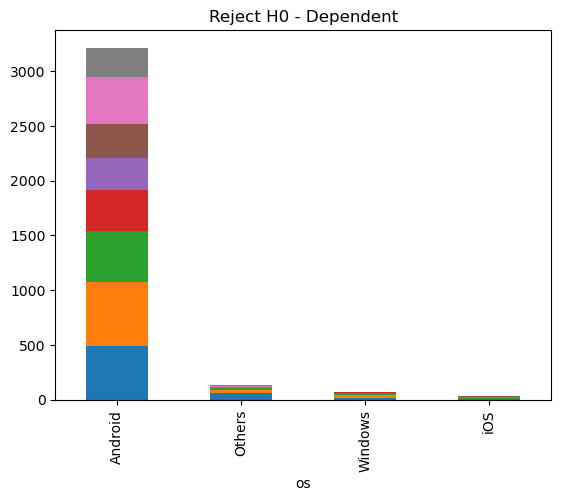

=====Analyze of internet and os=====


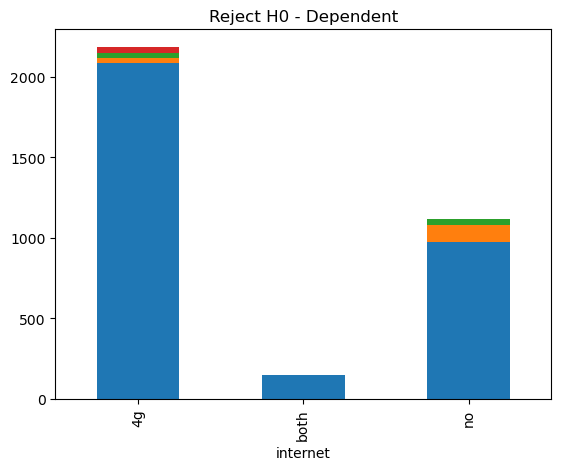

=====Analyze of internet and release_year=====


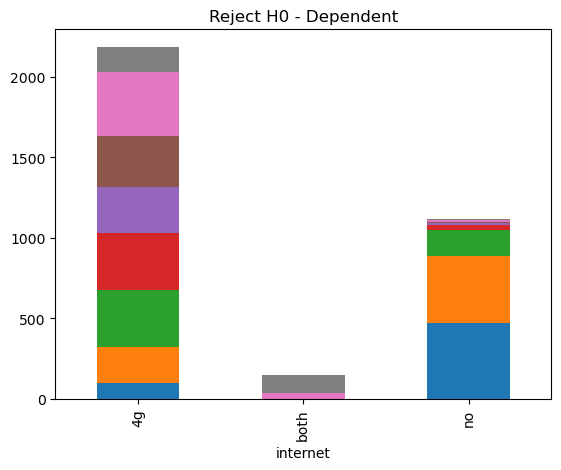

In [41]:
results = []
for pair in pairs:
    array = [x for x in pair]
    ret = _analyzer.analyze_category_vs_category(var1=array[0], 
                                                 var2=array[1],
                                                 df=df)
    results.append(ret)

In [42]:
pd.DataFrame(results)

,var1,var2,result
0,os,device_brand,Reject H0 - Dependent
1,device_brand,release_year,Reject H0 - Dependent
2,internet,device_brand,Reject H0 - Dependent
3,os,release_year,Reject H0 - Dependent
4,internet,os,Reject H0 - Dependent
5,internet,release_year,Reject H0 - Dependent


Most of category depend each others

### Output Continuous vs Input Category 

In [43]:
df_input_category = df.select_dtypes(include='O')

In [44]:
df_input_category.columns.to_list()

['device_brand', 'os', 'release_year', 'internet']

In [45]:
df_sub = pd.concat([df_input_category, df_output], axis=1)

                     sum_sq      df          F         PR(>F)
C(device_brand)  311.916793    28.0  43.080342  1.897047e-200
Residual         885.650075  3425.0        NaN            NaN


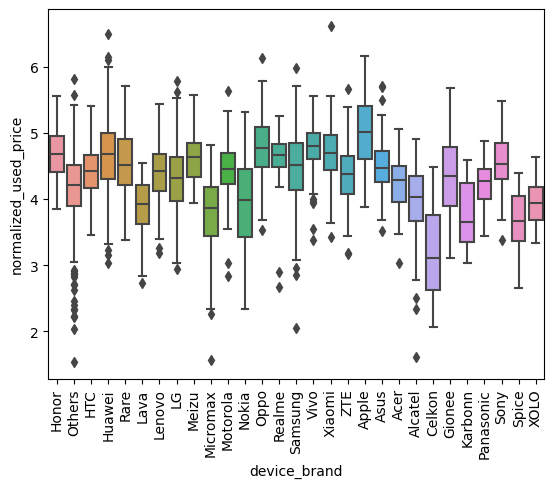

In [46]:
_analyzer.analyze_continous_vs_categories(continous_var='normalized_used_price',
                                         category_vars='device_brand',
                                         df=df_sub)

               sum_sq      df           F         PR(>F)
C(os)      174.870233     3.0  196.637752  1.000128e-117
Residual  1022.696635  3450.0         NaN            NaN


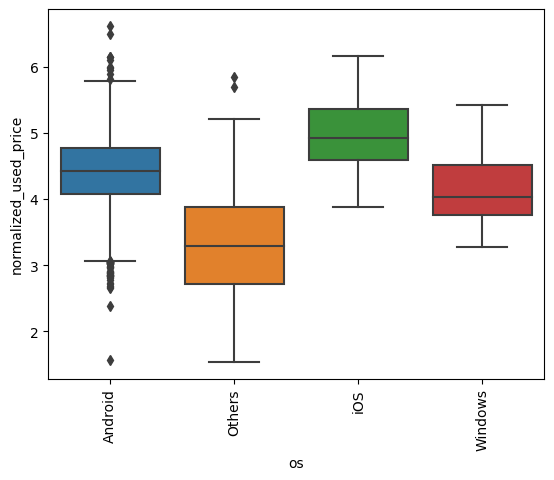

In [47]:
_analyzer.analyze_continous_vs_categories(continous_var='normalized_used_price',
                                         category_vars='os',
                                         df=df_sub)

                     sum_sq      df           F         PR(>F)
C(release_year)  320.206403     7.0  179.667359  2.113889e-227
Residual         877.360465  3446.0         NaN            NaN


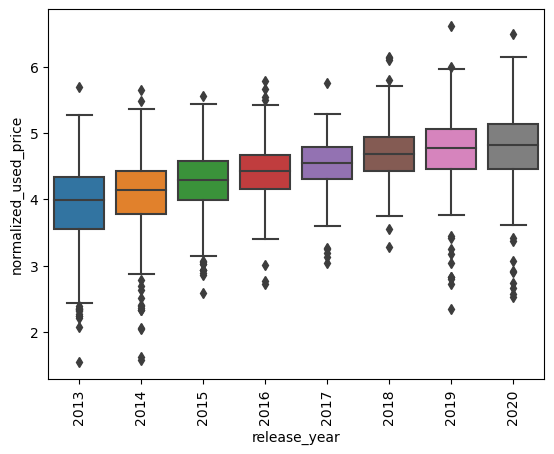

In [48]:
_analyzer.analyze_continous_vs_categories(continous_var='normalized_used_price',
                                         category_vars='release_year',
                                         df=df_sub)

                 sum_sq      df           F  PR(>F)
C(internet)  428.957941     2.0  962.995488     0.0
Residual     768.608926  3451.0         NaN     NaN


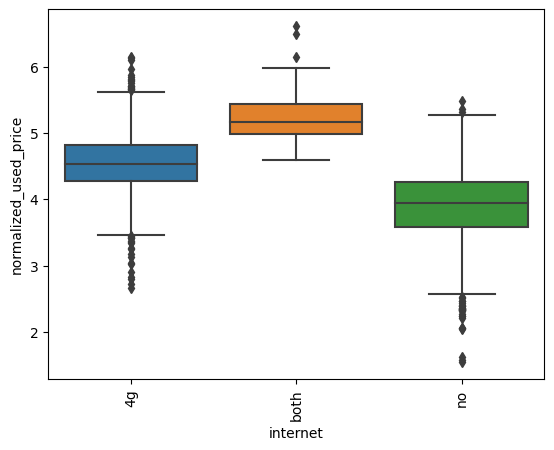

In [49]:
_analyzer.analyze_continous_vs_categories(continous_var='normalized_used_price',
                                         category_vars='internet',
                                         df=df_sub)

### Input Category vs Input Continuous 

In [50]:
df_input_numberic.columns.to_list()

['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_new_price']

In [51]:
df_input_category.columns.to_list()

['device_brand', 'os', 'release_year', 'internet']

In [52]:
df_sub = pd.concat([df_input_category, df_input_numberic], axis=1)
df_sub.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837


                       sum_sq      df          F        PR(>F)
C(device_brand)   7387.084749    28.0  21.204826  3.908520e-98
Residual         42612.882931  3425.0        NaN           NaN


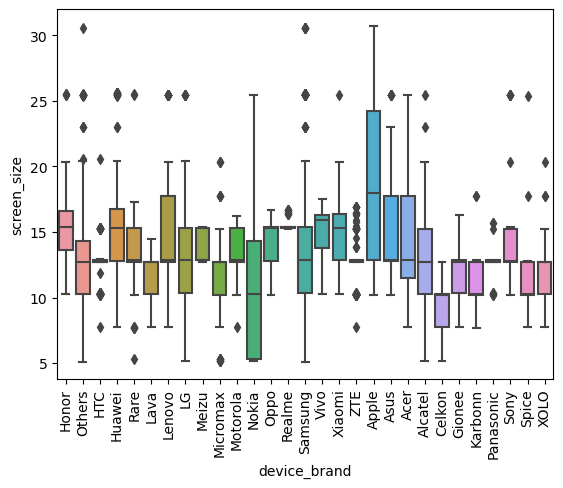

                       sum_sq      df          F         PR(>F)
C(device_brand)  14691.276891    28.0  29.177612  7.523849e-137
Residual         61590.304308  3425.0        NaN            NaN


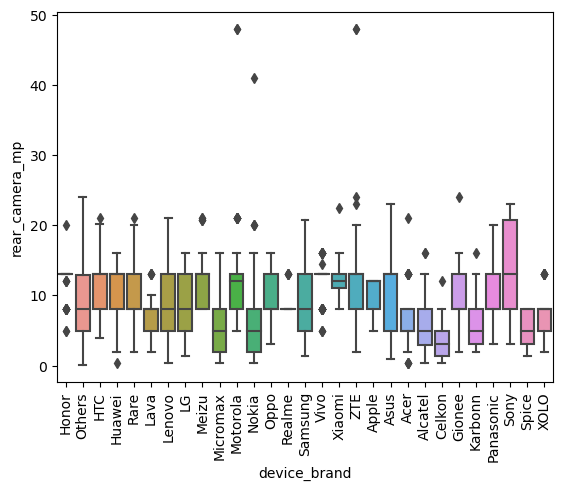

                        sum_sq      df          F         PR(>F)
C(device_brand)   44745.301160    28.0  44.523749  8.967051e-207
Residual         122930.105551  3425.0        NaN            NaN


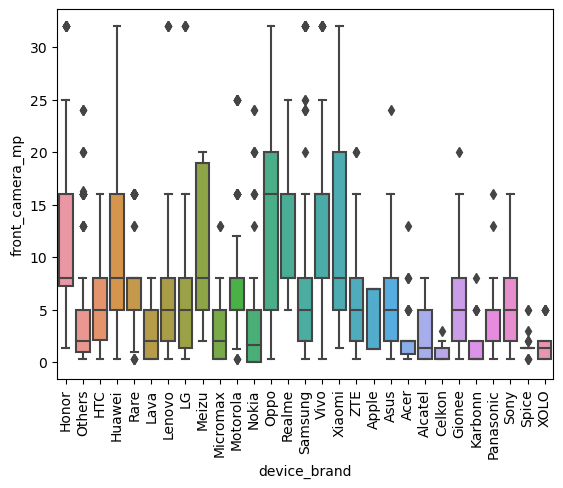

                       sum_sq      df         F        PR(>F)
C(device_brand)  2.139844e+06    28.0  11.49785  4.269357e-49
Residual         2.276502e+07  3425.0       NaN           NaN


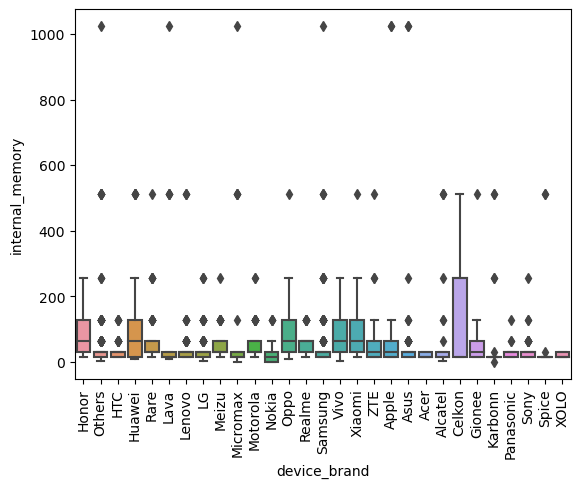

                      sum_sq      df          F         PR(>F)
C(device_brand)   969.299685    28.0  21.723547  1.058130e-100
Residual         5457.954037  3425.0        NaN            NaN


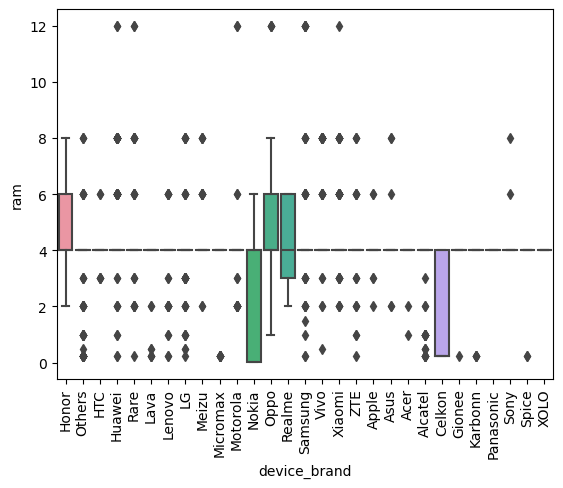

                       sum_sq      df          F         PR(>F)
C(device_brand)  1.076052e+09    28.0  27.729966  6.094602e-130
Residual         4.746642e+09  3425.0        NaN            NaN


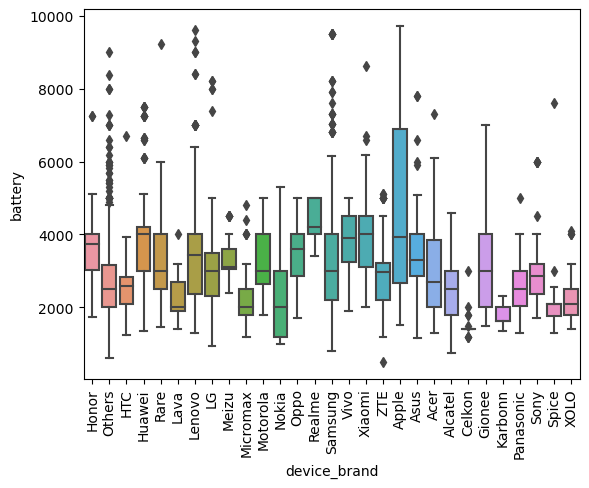

                       sum_sq      df          F        PR(>F)
C(device_brand)  2.583243e+06    28.0  12.972892  1.237851e-56
Residual         2.435741e+07  3425.0        NaN           NaN


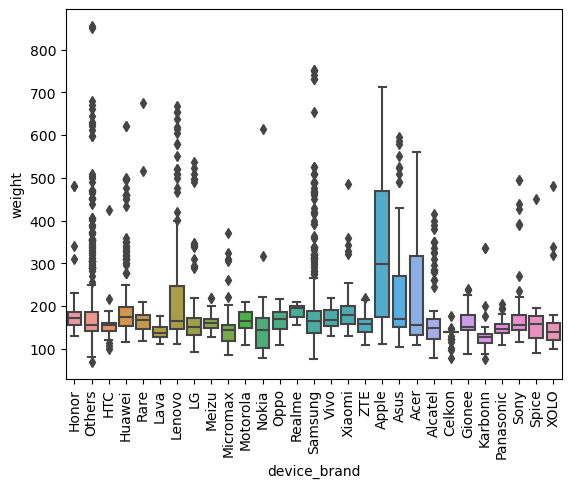

                       sum_sq      df         F         PR(>F)
C(device_brand)  3.807980e+07    28.0  26.57322  2.209760e-124
Residual         1.752883e+08  3425.0       NaN            NaN


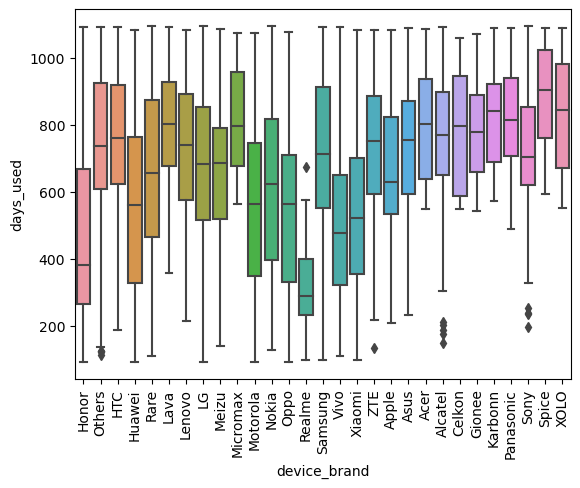

                      sum_sq      df         F         PR(>F)
C(device_brand)   405.796384    28.0  41.09088  1.201639e-191
Residual         1207.995392  3425.0       NaN            NaN


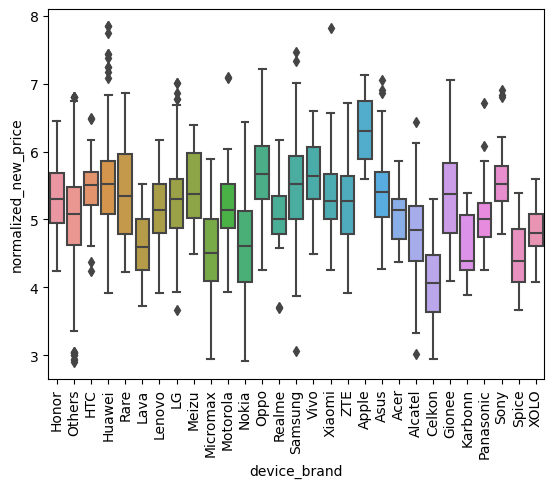

In [53]:
for numberic_col in df_input_numberic.columns.to_list():
    _analyzer.analyze_continous_vs_categories(continous_var=numberic_col,
                                         category_vars='device_brand',
                                         df=df_sub)

                sum_sq      df           F         PR(>F)
C(os)      6803.804187     3.0  181.135874  4.558138e-109
Residual  43196.163493  3450.0         NaN            NaN


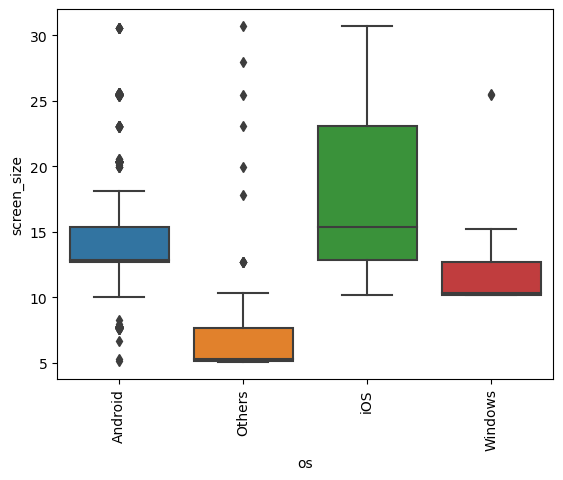

                sum_sq      df           F        PR(>F)
C(os)      6112.858941     3.0  100.184064  3.531743e-62
Residual  70168.722258  3450.0         NaN           NaN


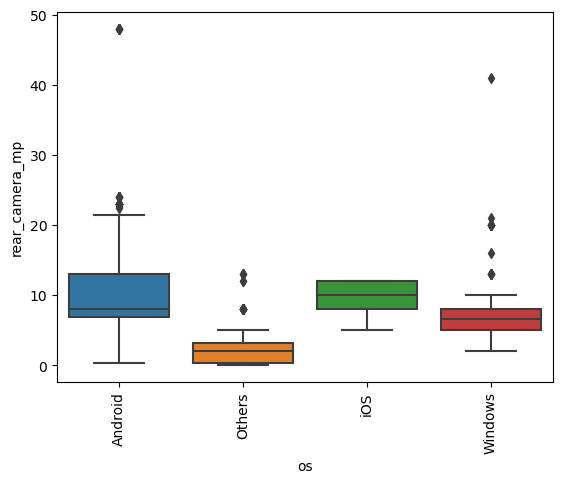

                 sum_sq      df          F        PR(>F)
C(os)       5392.445718     3.0  38.212962  2.750882e-24
Residual  162282.960993  3450.0        NaN           NaN


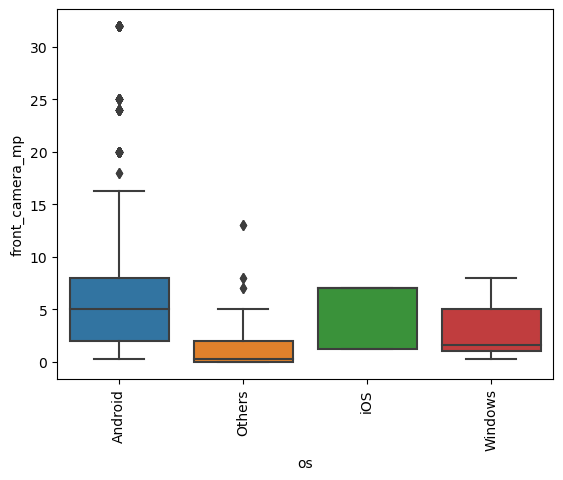

                sum_sq      df       F   PR(>F)
C(os)     1.082555e+05     3.0  5.0206  0.00179
Residual  2.479661e+07  3450.0     NaN      NaN


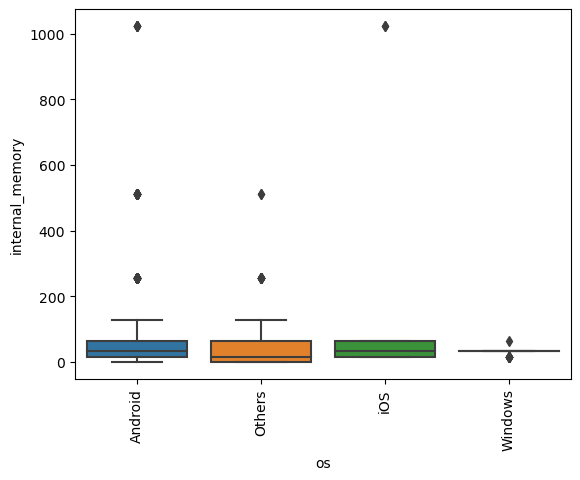

               sum_sq      df           F        PR(>F)
C(os)      638.874116     3.0  126.927618  5.466581e-78
Residual  5788.379606  3450.0         NaN           NaN


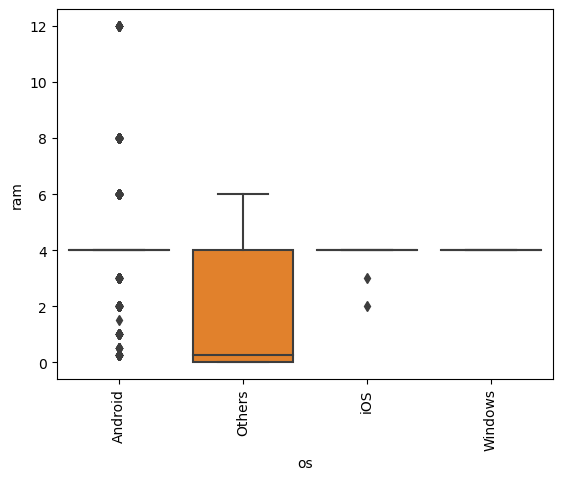

                sum_sq      df          F        PR(>F)
C(os)     3.858377e+08     3.0  81.612103  5.242766e-51
Residual  5.436857e+09  3450.0        NaN           NaN


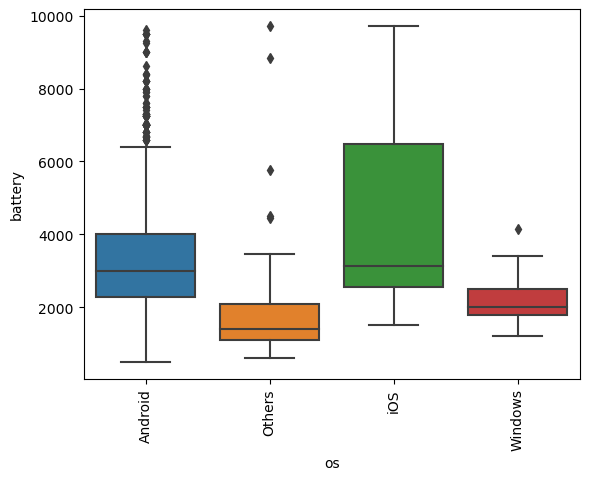

                sum_sq      df          F        PR(>F)
C(os)     9.149409e+05     3.0  40.428564  1.136284e-25
Residual  2.602571e+07  3450.0        NaN           NaN


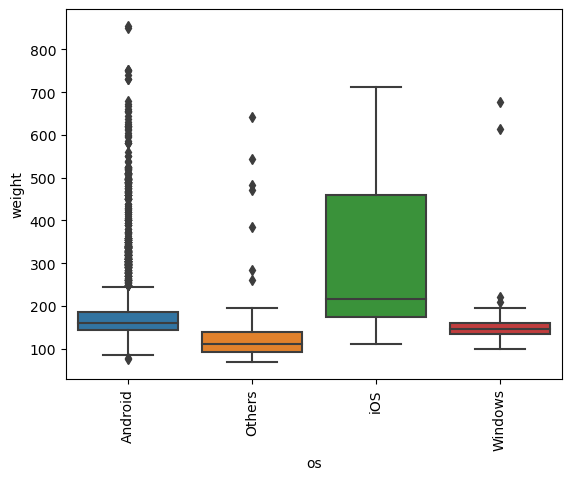

                sum_sq      df          F        PR(>F)
C(os)     2.119459e+06     3.0  11.537954  1.594700e-07
Residual  2.112487e+08  3450.0        NaN           NaN


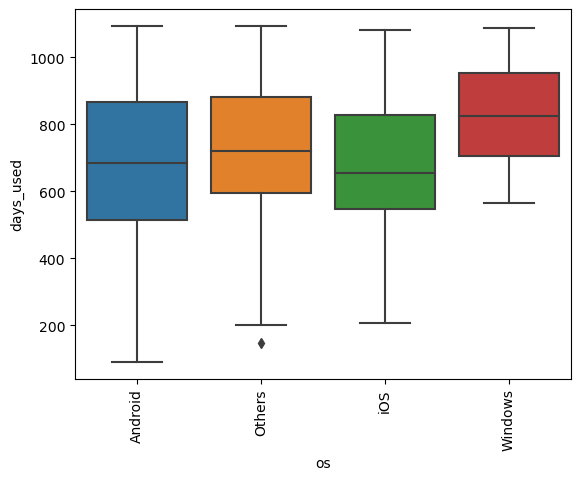

               sum_sq      df           F         PR(>F)
C(os)      241.851660     3.0  202.727077  4.223918e-121
Residual  1371.940116  3450.0         NaN            NaN


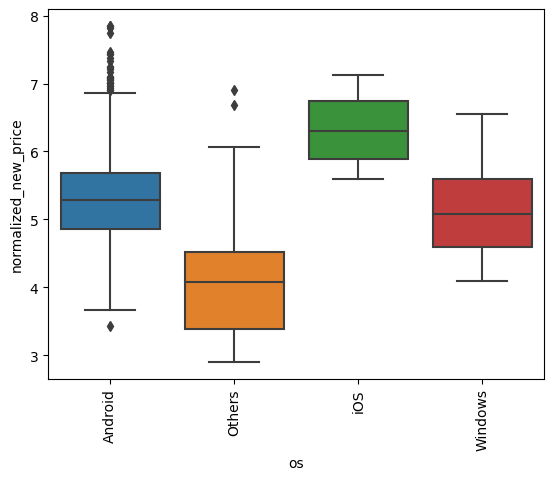

In [54]:
for numberic_col in df_input_numberic.columns.to_list():
    _analyzer.analyze_continous_vs_categories(continous_var=numberic_col,
                                         category_vars='os',
                                         df=df_sub)

                       sum_sq      df          F         PR(>F)
C(release_year)   6952.287746     7.0  79.505143  2.527101e-107
Residual         43047.679935  3446.0        NaN            NaN


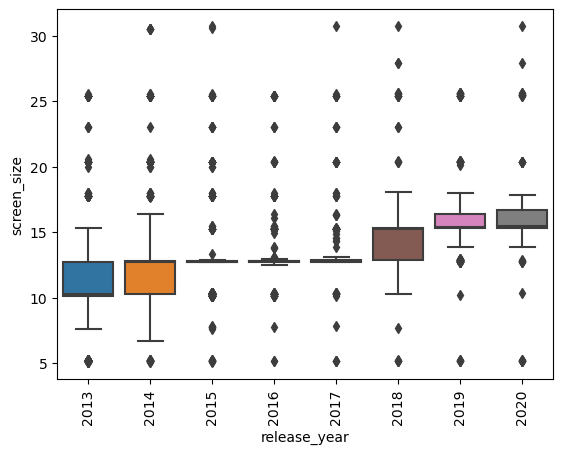

                       sum_sq      df           F         PR(>F)
C(release_year)  16825.396573     7.0  139.311031  2.908731e-181
Residual         59456.184627  3446.0         NaN            NaN


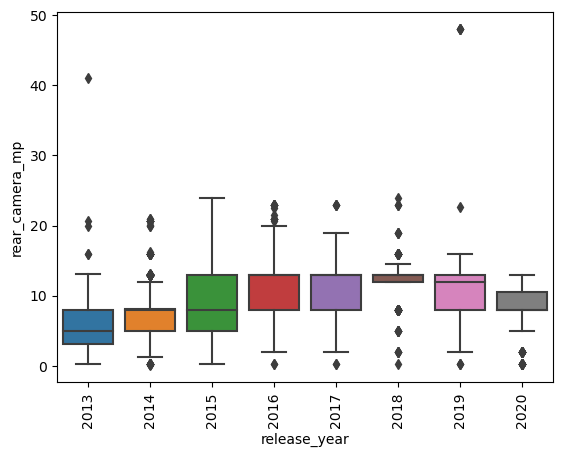

                       sum_sq      df          F  PR(>F)
C(release_year)  82622.099112     7.0  478.21396     0.0
Residual         85053.307599  3446.0        NaN     NaN


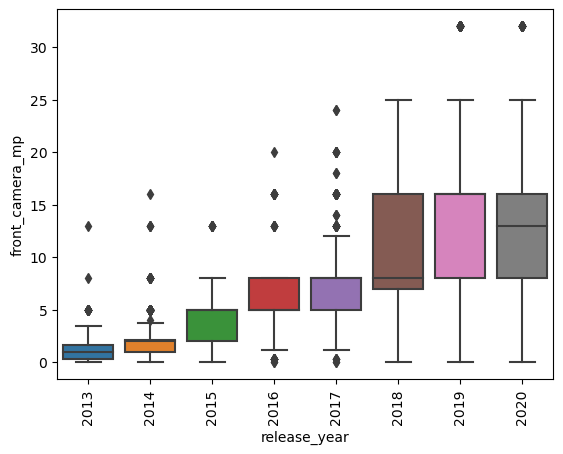

                       sum_sq      df         F        PR(>F)
C(release_year)  2.293365e+06     7.0  49.92994  4.997769e-68
Residual         2.261150e+07  3446.0       NaN           NaN


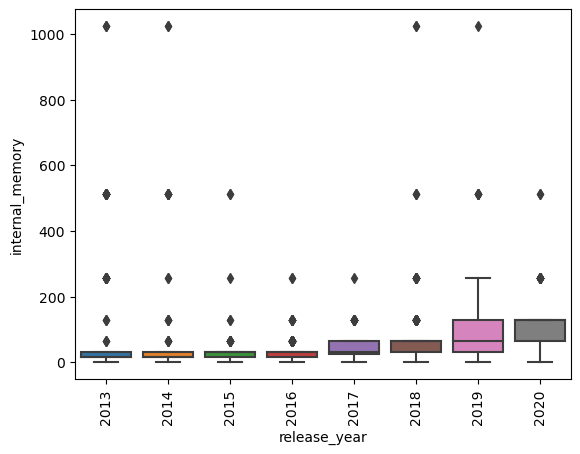

                      sum_sq      df          F        PR(>F)
C(release_year)   812.354468     7.0  71.223094  1.649177e-96
Residual         5614.899254  3446.0        NaN           NaN


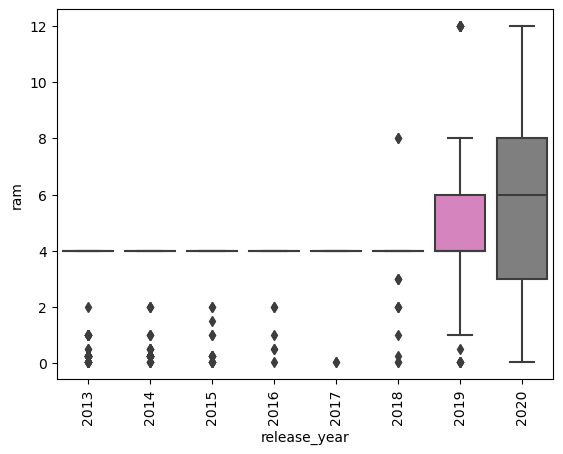

                       sum_sq      df           F         PR(>F)
C(release_year)  1.396586e+09     7.0  155.332721  6.447643e-200
Residual         4.426108e+09  3446.0         NaN            NaN


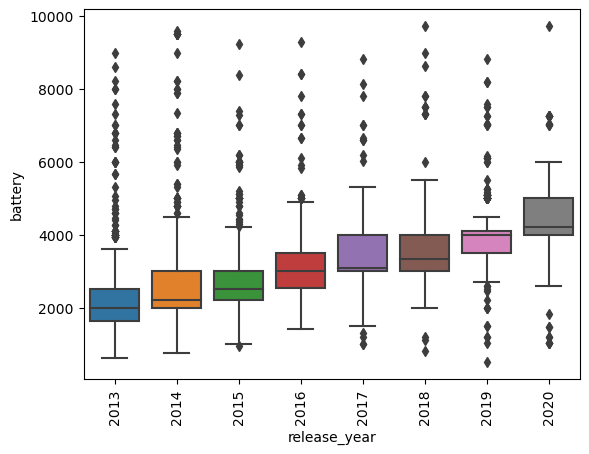

                       sum_sq      df         F   PR(>F)
C(release_year)  2.493297e+05     7.0  4.598554  0.00004
Residual         2.669132e+07  3446.0       NaN      NaN


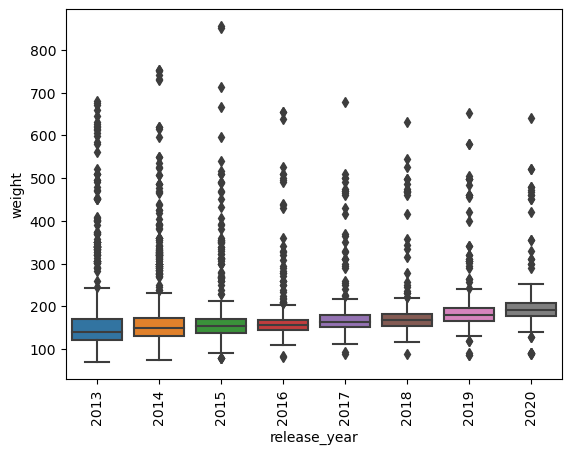

                       sum_sq      df            F  PR(>F)
C(release_year)  1.458987e+08     7.0  1064.540163     0.0
Residual         6.746938e+07  3446.0          NaN     NaN


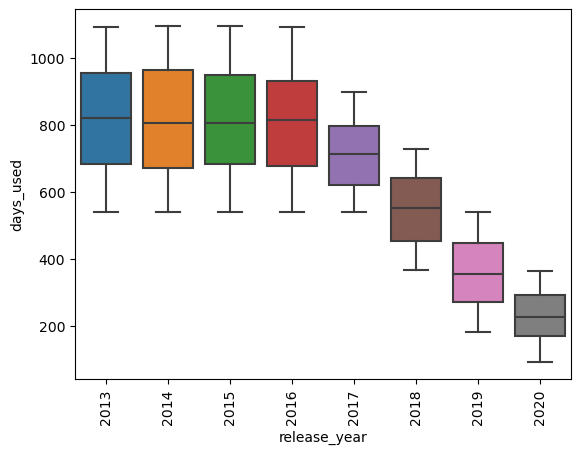

                      sum_sq      df         F        PR(>F)
C(release_year)   160.697127     7.0  54.44167  3.823838e-74
Residual         1453.094650  3446.0       NaN           NaN


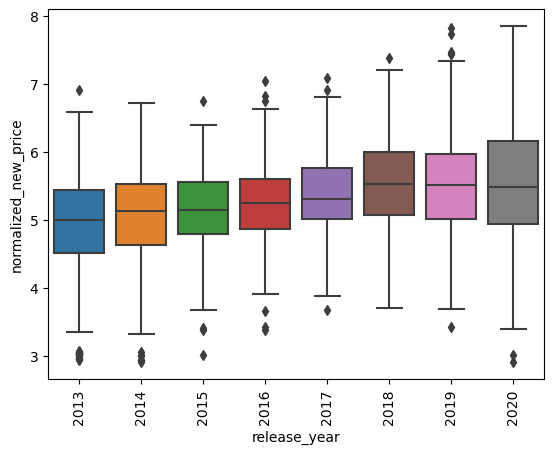

In [55]:
for numberic_col in df_input_numberic.columns.to_list():
    _analyzer.analyze_continous_vs_categories(continous_var=numberic_col,
                                         category_vars='release_year',
                                         df=df_sub)

                   sum_sq      df           F        PR(>F)
C(internet)   4197.909414     2.0  158.147755  1.926640e-66
Residual     45802.058266  3451.0         NaN           NaN


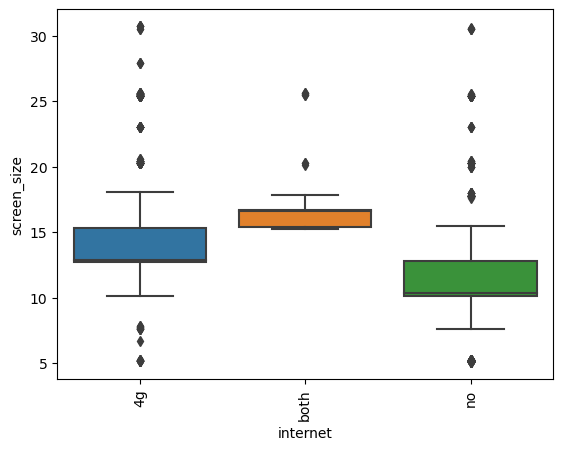

                   sum_sq      df           F         PR(>F)
C(internet)  22531.399376     2.0  723.307872  4.522859e-263
Residual     53750.181824  3451.0         NaN            NaN


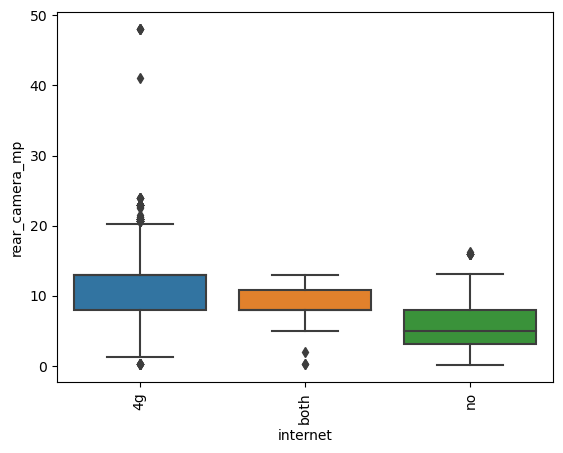

                    sum_sq      df          F         PR(>F)
C(internet)   57228.759075     2.0  894.08077  1.373440e-313
Residual     110446.647636  3451.0        NaN            NaN


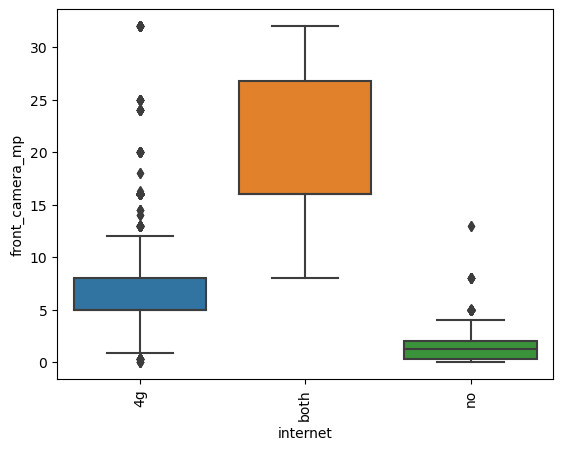

                   sum_sq      df           F        PR(>F)
C(internet)  1.723038e+06     2.0  128.251387  1.878994e-54
Residual     2.318183e+07  3451.0         NaN           NaN


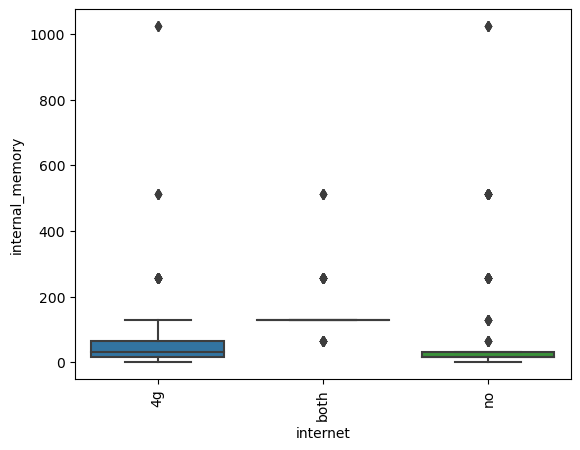

                  sum_sq      df          F  PR(>F)
C(internet)  2286.549050     2.0  952.84274     0.0
Residual     4140.704672  3451.0        NaN     NaN


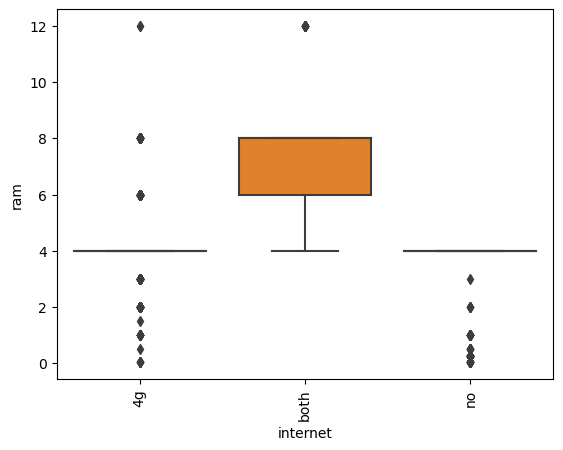

                   sum_sq      df           F         PR(>F)
C(internet)  1.032584e+09     2.0  371.958669  5.185466e-147
Residual     4.790111e+09  3451.0         NaN            NaN


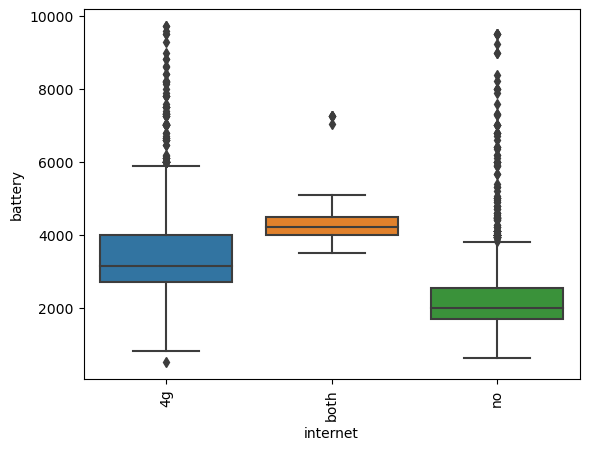

                   sum_sq      df         F    PR(>F)
C(internet)  1.007589e+05     2.0  6.477653  0.001556
Residual     2.683989e+07  3451.0       NaN       NaN


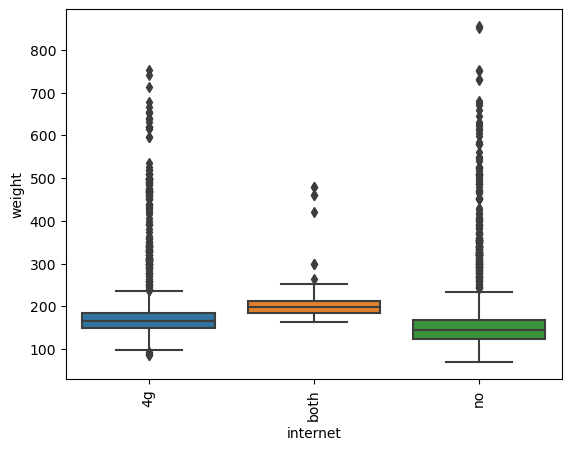

                   sum_sq      df           F         PR(>F)
C(internet)  4.836381e+07     2.0  505.755007  2.371982e-193
Residual     1.650043e+08  3451.0         NaN            NaN


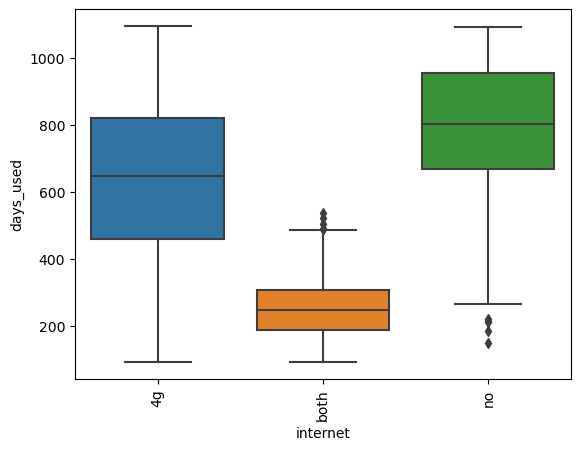

                  sum_sq      df           F         PR(>F)
C(internet)   462.991933     2.0  694.206368  4.114215e-254
Residual     1150.799844  3451.0         NaN            NaN


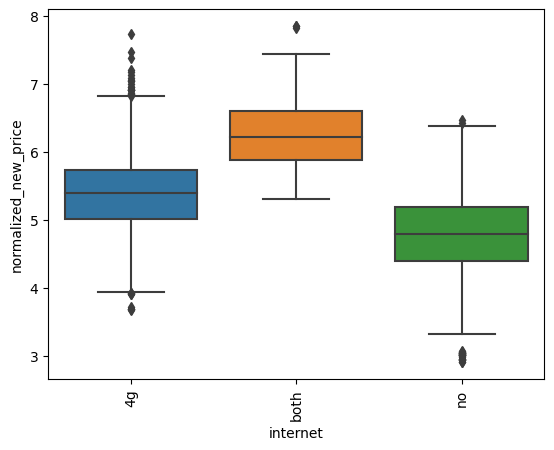

In [56]:
for numberic_col in df_input_numberic.columns.to_list():
    _analyzer.analyze_continous_vs_categories(continous_var=numberic_col,
                                         category_vars='internet',
                                         df=df_sub)

## Detect Outlier and treatment

Seem we have many outlier, we can seperate into 2 case.  
* Keep all outlier and apply RobustScaler
* Remove all outlier and apply MinMaxScaler

### Case 1: Keep all outlier

In [57]:
_df_mobile_in_keep = pd.concat([df_input_category, 
                                          df_input_numberic, 
                                          df_output], axis=1)
_df_mobile_in_keep.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,normalized_used_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,4.307572
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,5.162097
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,5.111084
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,5.135387
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,4.389995


In [58]:
_df_mobile_in_keep.shape

(3454, 14)

### Case 2: Remove all oulier

In [59]:
_df_mobile_in_remove_outlier = pd.concat([df_input_category, 
                                          df_input_numberic, 
                                          df_output], axis=1)
_df_mobile_in_remove_outlier.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,normalized_used_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,4.307572
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,5.162097
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,5.111084
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,5.135387
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,4.389995


In [60]:
upper_outlier = []
lower_outlier = []
for column in df_input_numberic.columns:
    outliers = _analyzer.check_outlier_of_numerical_variable(numerical_variable=column, df=_df_mobile_in_remove_outlier)
    if outliers:
        upper, lower = outliers
        upper_outlier += upper.to_list()
        lower_outlier += lower.to_list()
outlier_index = pd.Index(list(set(upper_outlier).intersection(set(lower_outlier))))

variable screen_size have 7.296% upper outlier
variable screen_size have 5.732% lower outlier
variable rear_camera_mp have 0.145% upper outlier
variable rear_camera_mp have 0.0% lower outlier
variable front_camera_mp have 6.398% upper outlier
variable front_camera_mp have 0.0% lower outlier
variable internal_memory have 3.995% upper outlier
variable internal_memory have 0.0% lower outlier
variable ram have 8.743% upper outlier
variable ram have 9.641% lower outlier
variable battery have 2.229% upper outlier
variable battery have 0.0% lower outlier
variable weight have 10.567% upper outlier
variable weight have 0.087% lower outlier
Variable days_used have no outlier
variable normalized_new_price have 0.695% upper outlier
variable normalized_new_price have 1.216% lower outlier


In [61]:
_df_mobile_in_remove_outlier.drop(outlier_index, inplace=True)
_df_mobile_in_remove_outlier.reset_index(inplace=True, drop=True)

In [62]:
_df_mobile_in_remove_outlier.shape

(3352, 14)

In [63]:
_df_mobile_in_keep.isnull().values.any()

False

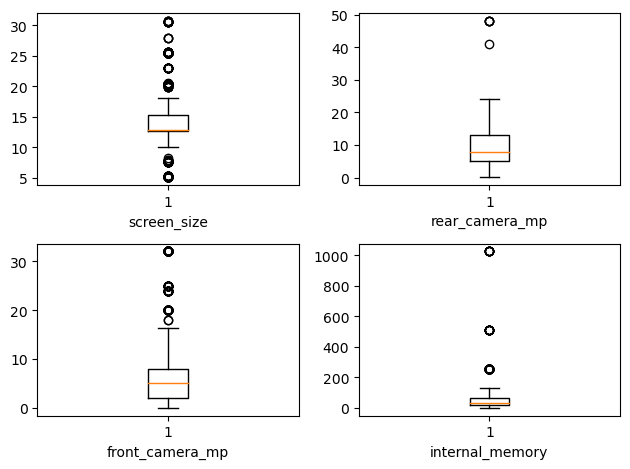

In [64]:
plt.subplot(2,2,1)
plt.boxplot(_df_mobile_in_remove_outlier['screen_size'])
plt.xlabel('screen_size')
plt.subplot(2,2,2)
plt.boxplot(_df_mobile_in_remove_outlier['rear_camera_mp'])
plt.xlabel('rear_camera_mp')
plt.subplot(2,2,3)
plt.boxplot(_df_mobile_in_remove_outlier['front_camera_mp'])
plt.xlabel('front_camera_mp')
plt.subplot(2,2,4)
plt.boxplot(_df_mobile_in_remove_outlier['internal_memory'])
plt.xlabel('internal_memory')
plt.tight_layout()
plt.show()

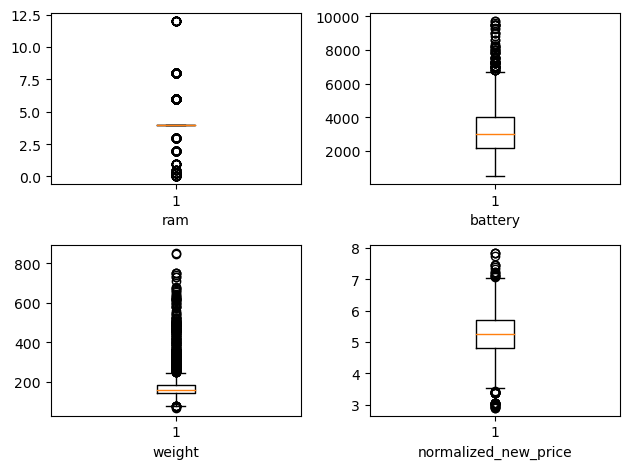

In [65]:
plt.subplot(2,2,1)
plt.boxplot(_df_mobile_in_remove_outlier['ram'])
plt.xlabel('ram')
plt.subplot(2,2,2)
plt.boxplot(_df_mobile_in_remove_outlier['battery'])
plt.xlabel('battery')
plt.subplot(2,2,3)
plt.boxplot(_df_mobile_in_remove_outlier['weight'])
plt.xlabel('weight')
plt.subplot(2,2,4)
plt.boxplot(_df_mobile_in_remove_outlier['normalized_new_price'])
plt.xlabel('normalized_new_price')
plt.tight_layout()
plt.show()

Finally, we have 2 case
* `_df_mobile_in_keep` which keep all outlier 
* `_df_mobile_in_remove_outlier` which remove outlier intersection between all numeric variables

## Data Standardization

In [66]:
_df_mobile_in_keep.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,normalized_used_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,4.307572
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,5.162097
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,5.111084
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,5.135387
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,4.389995


In [67]:
_df_mobile_in_remove_outlier.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,normalized_used_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,4.307572
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,5.162097
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,5.111084
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,5.135387
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,4.389995


### Scaler for non outlier data

In [68]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [69]:
numeric_cols = df_input_numberic.columns
numeric_cols

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'days_used', 'normalized_new_price'],
      dtype='object')

In [70]:
scaler = MinMaxScaler()

In [71]:
scaled_data = scaler.fit_transform(_df_mobile_in_remove_outlier[numeric_cols])

In [72]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols).add_prefix('S_')

In [73]:
_df_mobile_in_remove_outlier = pd.concat([_df_mobile_in_remove_outlier, scaled_df], axis=1)
_df_mobile_in_remove_outlier.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,normalized_used_price,S_screen_size,S_rear_camera_mp,S_front_camera_mp,S_internal_memory,S_ram,S_battery,S_weight,S_days_used,S_normalized_new_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,...,4.307572,0.367538,0.269616,0.15625,0.062491,0.248748,0.273319,0.097964,0.035892,0.366665
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,...,5.162097,0.476785,0.269616,0.50000,0.124991,0.666110,0.412148,0.183206,0.233300,0.529190
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,...,5.111084,0.452985,0.269616,0.25000,0.124991,0.666110,0.401302,0.183206,0.070788,0.603105
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,...,5.135387,0.796723,0.269616,0.25000,0.062491,0.499165,0.732104,0.522901,0.253240,0.551821
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,...,4.389995,0.399532,0.269616,0.25000,0.062491,0.248748,0.488069,0.147583,0.201396,0.413717


### Scaler for outlier data

In [74]:
scaler = RobustScaler()

In [75]:
scaled_data = scaler.fit_transform(_df_mobile_in_keep[numeric_cols])

In [76]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols).add_prefix('S_')

In [77]:
_df_mobile_in_keep = pd.concat([_df_mobile_in_keep, scaled_df], axis=1)
_df_mobile_in_keep.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,normalized_used_price,S_screen_size,S_rear_camera_mp,S_front_camera_mp,S_internal_memory,S_ram,S_battery,S_weight,S_days_used,S_normalized_new_price
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,...,4.307572,0.632576,0.625,0.000000,0.666667,-1.0,0.010526,-0.325581,-1.680835,-0.600867
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,...,5.162097,1.693182,0.625,1.833333,2.000000,4.0,0.684211,1.232558,-1.090231,0.309184
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,...,5.111084,1.462121,0.625,0.500000,2.000000,4.0,0.631579,1.232558,-1.576435,0.723065
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,...,5.135387,4.799242,0.625,0.500000,0.666667,2.0,2.236842,7.441860,-1.030574,0.435906
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,...,4.389995,0.943182,0.625,0.500000,0.666667,-1.0,1.052632,0.581395,-1.185682,-0.337404


Finally, we have 2 options:
* `_df_mobile_in_remove_outlier` for non outlier data which apply MinMaxScaler
* `_df_mobile_in_keep` for outlier data which apply RobustScaler

## Feature Engineering

### Encoder for non outlier data

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
encoder = LabelEncoder()

In [80]:
_df_mobile_in_remove_outlier['E_release_year'] = encoder.fit_transform(_df_mobile_in_remove_outlier['release_year'])
_df_mobile_in_remove_outlier.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,S_screen_size,S_rear_camera_mp,S_front_camera_mp,S_internal_memory,S_ram,S_battery,S_weight,S_days_used,S_normalized_new_price,E_release_year
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,...,0.367538,0.269616,0.15625,0.062491,0.248748,0.273319,0.097964,0.035892,0.366665,7
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,...,0.476785,0.269616,0.50000,0.124991,0.666110,0.412148,0.183206,0.233300,0.529190,7
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,...,0.452985,0.269616,0.25000,0.124991,0.666110,0.401302,0.183206,0.070788,0.603105,7
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,...,0.796723,0.269616,0.25000,0.062491,0.499165,0.732104,0.522901,0.253240,0.551821,7
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,...,0.399532,0.269616,0.25000,0.062491,0.248748,0.488069,0.147583,0.201396,0.413717,7


In [81]:
df_input_category.head()

,device_brand,os,release_year,internet
0,Honor,Android,2020,4g
1,Honor,Android,2020,both
2,Honor,Android,2020,both
3,Honor,Android,2020,both
4,Honor,Android,2020,4g


In [82]:
columns = df_input_category.columns.drop('release_year')
columns

Index(['device_brand', 'os', 'internet'], dtype='object')

In [83]:
_df_mobile_in_remove_outlier = pd.get_dummies(_df_mobile_in_remove_outlier, columns=columns, drop_first=True, prefix='E')
_df_mobile_in_remove_outlier.head()

,release_year,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,...,E_Spice,E_Vivo,E_XOLO,E_Xiaomi,E_ZTE,E_Others,E_Windows,E_iOS,E_both,E_no
0,2020,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,0,0
1,2020,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,0
2,2020,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,0
3,2020,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,0
4,2020,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,0,0


### Encoder for outlier data

In [84]:
encoder = LabelEncoder()

In [85]:
_df_mobile_in_keep['E_release_year'] = encoder.fit_transform(_df_mobile_in_keep['release_year'])
_df_mobile_in_keep.head()

,device_brand,os,release_year,internet,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,S_screen_size,S_rear_camera_mp,S_front_camera_mp,S_internal_memory,S_ram,S_battery,S_weight,S_days_used,S_normalized_new_price,E_release_year
0,Honor,Android,2020,4g,14.50,13.0,5.0,64.0,3.0,3020.0,...,0.632576,0.625,0.000000,0.666667,-1.0,0.010526,-0.325581,-1.680835,-0.600867,7
1,Honor,Android,2020,both,17.30,13.0,16.0,128.0,8.0,4300.0,...,1.693182,0.625,1.833333,2.000000,4.0,0.684211,1.232558,-1.090231,0.309184,7
2,Honor,Android,2020,both,16.69,13.0,8.0,128.0,8.0,4200.0,...,1.462121,0.625,0.500000,2.000000,4.0,0.631579,1.232558,-1.576435,0.723065,7
3,Honor,Android,2020,both,25.50,13.0,8.0,64.0,6.0,7250.0,...,4.799242,0.625,0.500000,0.666667,2.0,2.236842,7.441860,-1.030574,0.435906,7
4,Honor,Android,2020,4g,15.32,13.0,8.0,64.0,3.0,5000.0,...,0.943182,0.625,0.500000,0.666667,-1.0,1.052632,0.581395,-1.185682,-0.337404,7


In [86]:
_df_mobile_in_keep = pd.get_dummies(_df_mobile_in_keep, columns=columns, drop_first=True, prefix='E')
_df_mobile_in_keep.head()

,release_year,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_new_price,...,E_Spice,E_Vivo,E_XOLO,E_Xiaomi,E_ZTE,E_Others,E_Windows,E_iOS,E_both,E_no
0,2020,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,0,0
1,2020,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,0
2,2020,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,0
3,2020,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,0
4,2020,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,0,0


Now, we finished preprocessing data and move to modelling 

## Build model

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Case 1: Modelling for non outlier data with scaler

In [88]:
_df_mobile_in_remove_outlier.columns

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

In [89]:
X = _df_mobile_in_remove_outlier[['S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_ram',
       'S_battery', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no']]
y = _df_mobile_in_remove_outlier[['normalized_used_price']]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_predict = model.predict(X_test)
y_predict[:5]

array([[4.47814202],
       [4.28261259],
       [3.81992362],
       [4.49306586],
       [4.76850341]])

In [93]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'score of training without outlier: {train_acc.round(3)}')
print(f'score of test without outlier: {test_acc.round(3)}')

train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_test, model.predict(X_test))
test_rmse = np.sqrt(test_mse)
print(f'rmse of training without outlier: {train_rmse.round(3)}')
print(f'rmse of test without outlier: {test_rmse.round(3)}')

score of training without outlier: 0.838
score of test without outlier: 0.83
rmse of training without outlier: 0.229
rmse of test without outlier: 0.234


In [127]:
p_min = y['normalized_used_price'].min()
p_max = y['normalized_used_price'].max()
p_range = p_max - p_min
print(f'Price: Min - {p_min}, Max - {p_max}, Range - {p_range}')

Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### Case 1.1: Modelling for outlier data with scaler

In [95]:
_df_mobile_in_keep.columns

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

In [120]:
X = _df_mobile_in_keep[['S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_ram',
       'S_battery', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no']]
y = _df_mobile_in_keep[['normalized_used_price']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_predict = model.predict(X_test)

In [124]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'score of training without outlier: {train_acc.round(3)}')
print(f'score of test without outlier: {test_acc.round(3)}')

train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_test, y_predict)
test_rmse = np.sqrt(test_mse)
print(f'rmse of training without outlier: {train_rmse.round(3)}')
print(f'rmse of test without outlier: {test_rmse.round(3)}')

score of training without outlier: 0.836
score of test without outlier: 0.861
rmse of training without outlier: 0.237
rmse of test without outlier: 0.224


In [128]:
p_min = y['normalized_used_price'].min()
p_max = y['normalized_used_price'].max()
p_range = p_max - p_min
print(f'Price: Min - {p_min}, Max - {p_max}, Range - {p_range}')

Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### Case 2: Modelling for non outlier data without scaler

In [102]:
_df_mobile_in_remove_outlier.columns

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

In [103]:
X = _df_mobile_in_remove_outlier[['screen_size', 'rear_camera_mp', 'front_camera_mp',
       'ram', 'battery', 'normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no']]
y = _df_mobile_in_remove_outlier[['normalized_used_price']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_predict = model.predict(X_test)

In [107]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'score of training without outlier: {train_acc.round(3)}')
print(f'score of test without outlier: {test_acc.round(3)}')

train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_test, y_predict)
test_rmse = np.sqrt(test_mse)
print(f'rmse of training without outlier: {train_rmse.round(3)}')
print(f'rmse of test without outlier: {test_rmse.round(3)}')

score of training without outlier: 0.838
score of test without outlier: 0.83
rmse of training without outlier: 0.229
rmse of test without outlier: 0.234


In [129]:
p_min = y['normalized_used_price'].min()
p_max = y['normalized_used_price'].max()
p_range = p_max - p_min
print(f'Price: Min - {p_min}, Max - {p_max}, Range - {p_range}')

Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### 2.1 Modelling for outlier data without scaler

In [109]:
X = _df_mobile_in_keep[['screen_size', 'rear_camera_mp', 'front_camera_mp',
       'ram', 'battery', 'normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no']]
y = _df_mobile_in_keep[['normalized_used_price']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
y_predict = model.predict(X_test)

In [113]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'score of training without outlier: {train_acc.round(3)}')
print(f'score of test without outlier: {test_acc.round(3)}')

train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_test, y_predict)
test_rmse = np.sqrt(test_mse)
print(f'rmse of training without outlier: {train_rmse.round(3)}')
print(f'rmse of test without outlier: {test_rmse.round(3)}')

score of training without outlier: 0.836
score of test without outlier: 0.861
rmse of training without outlier: 0.237
rmse of test without outlier: 0.224


In [130]:
p_min = y['normalized_used_price'].min()
p_max = y['normalized_used_price'].max()
p_range = p_max - p_min
print(f'Price: Min - {p_min}, Max - {p_max}, Range - {p_range}')

Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


## Conclusion

## Summary

|Remove outlier|Apply Scaler|R2 train|rmse train|R2 test|rmse test|
|---|---|---|---|---|---|
|Yes|Yes|0.838|0.229|0.83|0.234|
|No|Yes|0.836|0.237|0.861|0.224|
|Yes|No|0.838|0.229|0.83|0.234|
|No|No|0.836|0.237|0.861|0.224|

Conclusion: 
* Apply scaler not impact to result of model
* Remove Outlier make model have higher accuracy and rmse test smaller